# 統計學習初論 (Spring, 2019)

Homework 3

截止日期: 9AM, 2019/4/9
    
請將HTML檔上傳至Ceiba作業區。回答作業時建議使用 "三明治" 答題法。也就是說，先說明要做什麼，然後列出程式碼與結果，最後說明這些結果的意義。作業自己做。嚴禁抄襲。不接受紙本繳交，不接受遲交。請以英文或中文作答。

# 第一題 [Classification via Generative Models]

(50%) We are going to explore the problem of identifying smartphone position through probabilistic generative models. Motion sensors in smartphones provide valuable information for researchers to understand its owners. An interesting (and more challenging) task is to identify human activities through the data recorded by motion sensors. For example, we want to know whether the smartphone owner is walking, running, or biking. In this homework problem, we are going to tackle a simpler problem. We want to know the static position of the smartphone. There are six possible positions:

Phoneonback: The phone is laying on the back of the phone with the screen pointing up (away from the ground).
    
Phoneonfront: The phone is laying on the back of the phone with the screen pointing towards the ground
    
Phoneonbottom: The phone is standing on the bottom of the screen, meaning the bottom is pointed towards the ground
    
Phoneontop: The phone is standing on the top of the screen, meaning the top is pointed towards the ground
    
Phoneonleft: The phone is laying on the left side of the screen.
    
Phoneonright: The phone is laying on the right side of the screen.
    
The input data is the reading of the accelerometer (cf. https://en.wikipedia.org/wiki/Accelerometer) in the smartphone. We have a training dataset that contains about 28,500 data points for phones in each of the six positions. The following is some basic information of the training dataset.

In [1]:
%matplotlib inline
import pandas as pd
import pickle
from PIL import Image
a1= "C://Users//POPO//Desktop//a1.png"
a1= Image.open(a1)
a2= "C://Users//POPO//Desktop//a2.png"
a2= Image.open(a2)
a3= "C://Users//POPO//Desktop//a3.png"
a3= Image.open(a3)

with open('C://Users//POPO//Desktop//phone_train.pickle', 'rb') as fh1:
    traindata = pickle.load(fh1)
print("The first few rows are:")
print(traindata.head())
print("\nSummary statistics:")
print(traindata.describe())
print("\nLabel counts:")
print(traindata['label'].value_counts())

The first few rows are:
          x         y         z        label
0  0.138809  0.074341  9.801056  Phoneonback
1  0.164993  0.006500  9.690369  Phoneonback
2  0.211411 -0.001831  9.755829  Phoneonback
3  0.184036 -0.007782  9.774872  Phoneonback
4  0.142380  0.005310  9.765350  Phoneonback

Summary statistics:
                   x              y              z
count  167097.000000  167097.000000  167097.000000
mean        0.357340       0.146807      -0.015550
std         5.622396       5.552010       5.737150
min        -9.770279      -9.966507      -9.908417
25%         0.016617      -0.074875      -0.221497
50%         0.142776       0.009628       0.025223
75%         0.249893       0.295715       0.151032
max        10.073685       9.980255      10.031113

Label counts:
Phoneonleft      29522
Phoneonfront     29079
Phoneonback      28566
Phoneonbottom    27842
Phoneontop       26401
Phoneonright     25687
Name: label, dtype: int64


It is obvious that the last column, label, is the target of our predictive model and the first three columns are the input features.

We are going to train a model that can predict smartphone positions given its accelerometer readings. To achieve this goal, we are going to divide this question into two sub-questions. The first is about training a generative classifier, and the second is to predict smartphone positions.

Creat a Python class named mygpc for this task. The sample usage for model training and testing should be like the following:

pgc1 = mypgc()

pgc1.fit(X_train, Y_train)

ypred = pgc1.predict(X_test)

Model Training
To train probabilistic generative classifiers, we need to assume how the data are generated in one given position. Here we are going to adopt a simple assumption that the data are generated from multivariate Gaussian distributions. To train a model under this assumption, we need to compute the mean and covariance of features at each label in the training data.

For each of the six labels, you should record the following information:

mu: the mean vector.
    
cov: the covariance matrix.
    
prec: the inverse of covariance matrix.
    
detcov: logarithm of the determinant of the covariance matrix.
    
n: number of observations for this label.
    
prior: learned prior probability of this label.
    
You should store your learned parameters in a two-level dictionary structure. For example, you can access the precision of "Phoneonback" by amodel["Phoneonback"]["prec"], where amodel is the learned model.

Prediction
To predict phone positions, compute the posterior of each position given the trained model, and select the position with the largest probability. That is, given the reading  g=(gx,gy,gz)T , the probability that the phone position is k can be written as  Prob(POS=k│g)∝Prob(g│POS=k)Prob(POS=k) .

The likelihood  Prob(g|POS=k)  is simply  N(g|μk,σk) , where  μk  and  σk  are learned from the training data.

Answer the following questions:

Q1.1: Create your mypgc class.
    
Q1.2: Load data from "phone_train.picke" and train your model. List your learned model parameters in a pretty, human readable way so that the TA can easily check the correctness of your results.
    
Q1.3: Load the test data from "phone_test1.pickle" and apply your predict method. List the first 20 predictions and well as the correct labels. Compute the accuracy for your model. Accuracy is the number of correct predictions divided by total number of data points.
    
Implementation Restrictions
You are allowed to use the "building block" libraries including numpy and scipy in your own mypgc class. You will receive a zero score if you adopted an existing probabilistic generatic classifier in your answer. The input features and lables for the train method should be numpy arrays. The input features and output lables for the predict method should be numpy arrays.

In [2]:
#Q1.1: Create your mypgc class.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
class mypgc:
    def __init__(self):
        None
        
    def fit(self,X,Y):
        self.new_dic = {}
        self.new_dic["Phoneonback"]={}
        self.new_dic["Phoneonbottom"]={}
        self.new_dic["Phoneonfront"]={}
        self.new_dic["Phoneonleft"]={}
        self.new_dic["Phoneonright"]={}
        self.new_dic["Phoneontop"]={}
        
        class_0 = X[X["label"]=="Phoneonback"]
        class_1 = X[X["label"]=="Phoneonbottom"]
        class_2 = X[X["label"]=="Phoneonfront"]
        class_3 = X[X["label"]=="Phoneonleft"]
        class_4 = X[X["label"]=="Phoneonright"]
        class_5 = X[X["label"]=="Phoneontop"]
        
        #compute means for each class
        mean0=class_0.mean(axis=0)
        mean1=class_1.mean(axis=0)
        mean2=class_2.mean(axis=0)
        mean3=class_3.mean(axis=0)
        mean4=class_4.mean(axis=0)
        mean5=class_5.mean(axis=0)
        
        #compute covariance matrices, such that the columns are variables and rows are observations of variables
        cov0=np.cov(class_0[class_0.columns[:3]],rowvar=0)
        cov1=np.cov(class_1[class_1.columns[:3]],rowvar=0)
        cov2=np.cov(class_2[class_2.columns[:3]],rowvar=0)
        cov3=np.cov(class_3[class_3.columns[:3]],rowvar=0)
        cov4=np.cov(class_4[class_4.columns[:3]],rowvar=0)
        cov5=np.cov(class_5[class_5.columns[:3]],rowvar=0)
        
        #compute the inverse of covariance matrices
        prec0=np.linalg.inv(cov0)
        prec1=np.linalg.inv(cov1)
        prec2=np.linalg.inv(cov2)
        prec3=np.linalg.inv(cov3)
        prec4=np.linalg.inv(cov4)
        prec5=np.linalg.inv(cov5)
        
        #compute the number of observations for this label.
        n0=traindata["label"].value_counts()["Phoneonback"]
        n1=traindata["label"].value_counts()["Phoneonbottom"]
        n2=traindata["label"].value_counts()["Phoneonfront"]
        n3=traindata["label"].value_counts()["Phoneonleft"]
        n4=traindata["label"].value_counts()["Phoneonright"]
        n5=traindata["label"].value_counts()["Phoneontop"]
        
        total=n0+n1+n2+n3+n4+n5
        
        #compute the prior probability of this label.
        p0=n0/total
        p1=n1/total
        p2=n2/total
        p3=n3/total
        p4=n4/total
        p5=n5/total
        
        # compute logarithm of the determinant of the covariance matrix.
        detcov0=np.log(np.linalg.det(cov0))
        detcov1=np.log(np.linalg.det(cov1))
        detcov2=np.log(np.linalg.det(cov2))
        detcov3=np.log(np.linalg.det(cov3))
        detcov4=np.log(np.linalg.det(cov4))
        detcov5=np.log(np.linalg.det(cov5))
        


        #dictionary must include :cov,prec,detcov,n,prior
        self.new_dic["Phoneonback"]["cov"]=cov0
        self.new_dic["Phoneonback"]["prec"]=prec0
        self.new_dic["Phoneonback"]["detcov"]=detcov0
        self.new_dic["Phoneonback"]["n"]=n0
        self.new_dic["Phoneonback"]["prior"]=p0
        self.new_dic["Phoneonback"]["mu"]=mean0
        
        self.new_dic["Phoneonbottom"]["cov"]=cov1
        self.new_dic["Phoneonbottom"]["prec"]=prec1
        self.new_dic["Phoneonbottom"]["detcov"]=detcov1
        self.new_dic["Phoneonbottom"]["n"]=n1
        self.new_dic["Phoneonbottom"]["prior"]=p1
        self.new_dic["Phoneonbottom"]["mu"]=mean1
        
        self.new_dic["Phoneonfront"]["cov"]=cov2
        self.new_dic["Phoneonfront"]["prec"]=prec2
        self.new_dic["Phoneonfront"]["detcov"]=detcov2
        self.new_dic["Phoneonfront"]["n"]=n2
        self.new_dic["Phoneonfront"]["prior"]=p2
        self.new_dic["Phoneonfront"]["mu"]=mean2
        
        self.new_dic["Phoneonleft"]["cov"]=cov3
        self.new_dic["Phoneonleft"]["prec"]=prec3
        self.new_dic["Phoneonleft"]["detcov"]=detcov3
        self.new_dic["Phoneonleft"]["n"]=n3
        self.new_dic["Phoneonleft"]["prior"]=p3
        self.new_dic["Phoneonleft"]["mu"]=mean3
        
        self.new_dic["Phoneonright"]["cov"]=cov4
        self.new_dic["Phoneonright"]["prec"]=prec4
        self.new_dic["Phoneonright"]["detcov"]=detcov4
        self.new_dic["Phoneonright"]["n"]=n4
        self.new_dic["Phoneonright"]["prior"]=p4
        self.new_dic["Phoneonright"]["mu"]=mean4
        
        self.new_dic["Phoneontop"]["cov"]=cov5
        self.new_dic["Phoneontop"]["prec"]=prec5
        self.new_dic["Phoneontop"]["detcov"]=detcov5
        self.new_dic["Phoneontop"]["n"]=n5
        self.new_dic["Phoneontop"]["prior"]=p5
        self.new_dic["Phoneontop"]["mu"]=mean5
        return self.new_dic
    def predict(self,X_test):
        ans = np.ones([X_test.shape[0],1],dtype=int)
        new_dic=self.new_dic
        for i in range(len(X_test)):
            px0=new_dic["Phoneonback"]["prior"]*multivariate_normal.pdf(X_test.iloc[i][:3],mean=new_dic["Phoneonback"]["mu"],cov=new_dic["Phoneonback"]["cov"])
            px1=new_dic["Phoneonbottom"]["prior"]*multivariate_normal.pdf(X_test.iloc[i][:3],mean=new_dic["Phoneonbottom"]["mu"],cov=new_dic["Phoneonbottom"]["cov"])
            px2=new_dic["Phoneonfront"]["prior"]*multivariate_normal.pdf(X_test.iloc[i][:3],mean=new_dic["Phoneonfront"]["mu"],cov=new_dic["Phoneonfront"]["cov"])
            px3=new_dic["Phoneonleft"]["prior"]*multivariate_normal.pdf(X_test.iloc[i][:3],mean=new_dic["Phoneonleft"]["mu"],cov=new_dic["Phoneonleft"]["cov"])
            px4=new_dic["Phoneonright"]["prior"]*multivariate_normal.pdf(X_test.iloc[i][:3],mean=new_dic["Phoneonright"]["mu"],cov=new_dic["Phoneonright"]["cov"])
            px5=new_dic["Phoneontop"]["prior"]*multivariate_normal.pdf(X_test.iloc[i][:3],mean=new_dic["Phoneontop"]["mu"],cov=new_dic["Phoneontop"]["cov"])
            
            
            m=np.argmax([px0,px1, px2, px3,px4,px5])
            ans[i]=m
            return ans   

Q1.2: Load data from "phone_train.picke" and train your model. List your learned model parameters in a pretty, human readable way so that the TA can easily check the correctness of your results.

In [4]:
X_train=traindata
mapping={"Phoneonback":0,"Phoneonbottom":1,"Phoneonfront":2,"Phoneonleft":3,"Phoneonright":4,"Phoneontop":5}
Y_train=pd.DataFrame([])
Y_train["newlabel"]=X_train["label"].map(mapping)
pgc1 = mypgc()
pgc1.fit(X_train, Y_train)

{'Phoneonback': {'cov': array([[ 0.00299006, -0.00195813,  0.00284766],
         [-0.00195813,  0.00229887, -0.0024254 ],
         [ 0.00284766, -0.0024254 ,  0.0048876 ]]),
  'prec': array([[ 943.63669582,  469.54782044, -316.78479596],
         [ 469.54782044, 1146.63145078,  295.42598486],
         [-316.78479596,  295.42598486,  535.76812508]]),
  'detcov': -18.9875162403822,
  'n': 28566,
  'prior': 0.17095459523510295,
  'mu': x    0.206933
  y   -0.026152
  z    9.796376
  dtype: float64},
 'Phoneonbottom': {'cov': array([[ 0.00273883, -0.0044379 ,  0.00151984],
         [-0.0044379 ,  0.01026786, -0.00328148],
         [ 0.00151984, -0.00328148,  0.00247968]]),
  'prec': array([[1229.24902343,  503.42022589,  -87.22678994],
         [ 503.42022589,  374.93550309,  187.61601574],
         [ -87.22678994,  187.61601574,  705.02302834]]),
  'detcov': -18.24230757192601,
  'n': 27842,
  'prior': 0.1666217825574367,
  'mu': x    0.190768
  y    9.785847
  z    0.146557
  dtype: floa

Q1.3: Load the test data from "phone_test1.pickle" and apply your predict method. List the first 20 predictions and well as the correct labels. Compute the accuracy for your model. Accuracy is the number of correct predictions divided by total number of data points.

In [5]:
with open('C://Users//POPO//Desktop//phone_test1.pickle', 'rb') as fh1:
    testdata = pickle.load(fh1)
X_test=testdata
mapping={"Phoneonback":0,"Phoneonbottom":1,"Phoneonfront":2,"Phoneonleft":3,"Phoneonright":4,"Phoneontop":5}
Y_test=pd.DataFrame([])
Y_test["newlabel"]=X_test["label"].map(mapping)

In [6]:
ypred = pgc1.predict(X_test)
ypred[:20]

array([[2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [7]:
Y_test[:20]

,newlabel
0,2
1,1
2,1
3,1
4,2
5,4
6,2
7,5
8,2
9,2


In [8]:
(ypred==Y_test).mean()

newlabel    0.166301
dtype: float64

# 第二題 [Logistic Regression with L2 Regularization]

(100%) We discussed the Logistic regression and its variation, Bayesian logistic regression that adopts L2 regularization. The Logistic regression with L2 regularization minimize the following error function (cf. file 0b2 linear model for classification.pdf):

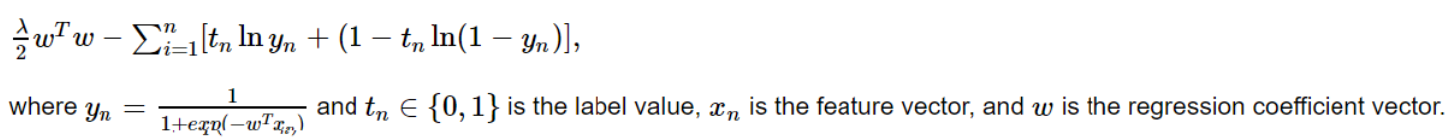

In [9]:
a1

We are going to consider an extension of this model to allow different level of regularization for different regression coefficients. Consider the constant term versus other features. The coefficient of the constant term is usually not regularized in logistic regression. It is because the constant term is associated with the prior class distribution (see the discussion in generative models), and regularizing this term will force the probability of the positive class given a zero feature vector to be 0.5. This may hurt the prediction ability since the true prior class probability may indicate other more reasonable values.

Another consideration is regarding the continuous-valued features and binary-valued features. We typically normalize continuous-valued features to have zero means and unit variances but keep binary-value features untouched. It makes sense to have a single regularization value for the continuous-valued features since all of them have been normalized. Similarly, if we do not have additional information, then all binary-valued features can have the same level of regularization. However, using the same regularization coefficient for the continuous-valued and binary-valued features may not be reasonable. That is, it is often beneficial to have a regularization coefficient for the continuous-valued features, and another regularization coefficient for the binary-valued features.

The above discussion suggests that a more sophisticated way to regularize a logistic regression is to have three regularization coefficients: 0 for the constant,  a1  for continuous-valued features, and  a2  for the binary-valued features. It is possible to further refine the regularization coefficients. However, hyper-parameter tuning associated with more regularization coefficients may be costly.

To achieve this goal, we are going to consider a variation of L2-regularized logistic regression that allow different level of regularization for each coefficient. In the following discussion, we are going to use  X  to denote the feature matrix in the training data. The i-th row in  X ,  xi , is the feature vector for the i-th training data. The last column of  X  is one unless the use does not want to include the constant term.

In this model, each regression coefficient may be associated with a different regularization coefficient. Bearing with the risk of ambigulity, we (again) use the scalar  λi  to denote the regularization coefficient for  wi . The vector  w=[w1,w2,...,wD]T  is the regression coefficient vector. Let  Λ  denote the diagonal matrix that have  λi  at  Λii . Our new error function becomes:

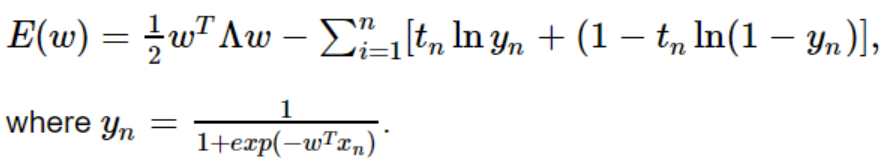

In [10]:
a2

This model allows  wi  to have regularization coefficient  λi . If the constant term is the last element in  w , then setting  λD  to  0  allow us to unregularize the constant term. We can simply set  λi  associated with continuous-valued features to one value, and elements associated with binary-value features to another value. This will achieve our goal of a more refined regularization structure.

Following the PRML text book and the class discussion, we are going to train the model using the Newton-Raphson optimization method. In order to do so, you need to derive the gradient and hession of  E(w) . Given the training dataset, we can optimize  w  via

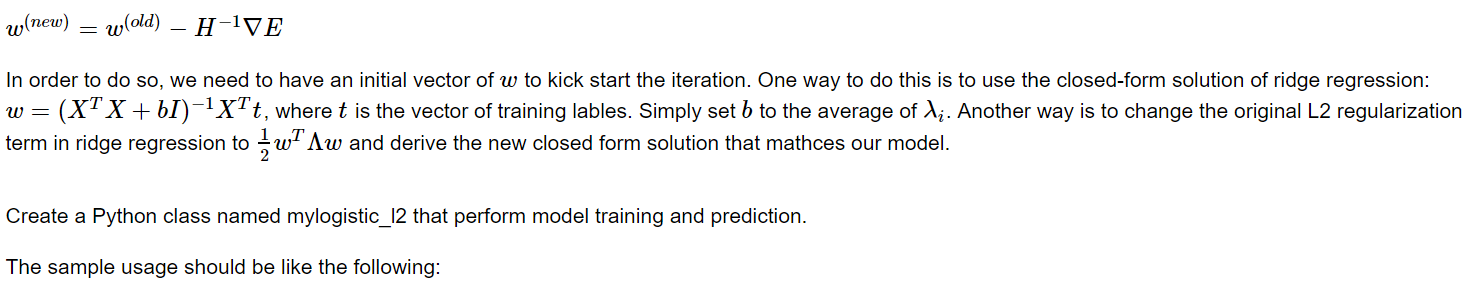

In [11]:
a3

Create a Python class named mylogistic_l2 that perform model training and prediction.

The sample usage should be like the following:

logic1 = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)

logic1.fit(X_train, Y_train)

ypred = logic1.predict(X_test)

The first line is to create an object with the specified regularization coefficient vector, lambda_vec, and set the maximum number of iteration to 1000. The "tol" parameter set the stopping condition for Newton-Raphson optimization. The iteration will stop if the improvement on the error function is less than  10−5 . The "add_intercept" option says that we need add a column of ones to the end of X_train before model training. The length of lambda_vec, as a result should match the number of columns after adding the "one column" when this option is turned on.

To simplify the discussion, we use 0.5 as the threshold for the positive case when making prediction.

Implementation Restrictions
You are allowed to use the "building block" libraries including numpy and scipy in your own mylogistic_l2 class. You will receive a zero score if you adopted an existing logistic regression classifier in your answer. The input features and lables for the train method should be numpy arrays. The input features and output lables for the predict method should be numpy arrays.

Dataset
We are going to use to "Adult" dataset on the UCI machine learning reposition https://archive.ics.uci.edu/ml/datasets/Adult. The goal is to predict the label values of the income column, which can be either '>50K' or '<=50K.' The dataset had splitted the training and test data, and we are going to respect this particular train-test split in model testing.

To use this dataset in our model testing, you need to go through the data cleaning process so that the label value will be 1 for '>50K' and 0 otherwise. You should remove all rows with missing values. That is, if a row contain any missing values, remove that row. All features with discrete-values (for example, native-country and workclass) should be converted to "1-of-K" encoding. Include a particular feature value only if this unique value appears more than 10 times in the training data.

Answer the following questions:

Q2.1 (20%) Download the Adult dataset. Clean up the dataset and create x_train, y_train, x_test, y_test for training feature, training value, test feature, test label. All of these variables should be numpy arrays. Provide summary statistics for your training and test datasets so that TA can verify the correctness of your procedure.

In [1]:
import pandas as pd
train=pd.read_csv("C://Users//POPO//Desktop//train.csv",header=None)
test=pd.read_csv("C://Users//POPO//Desktop//test.csv",header=None)

In [2]:
print(train.shape)
print(test.shape)

(32561, 15)
(16281, 15)


In [3]:
train.columns=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","class"]
test.columns=train.columns

In [4]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
import numpy as np
for i in train.columns:
    train[i]=train[i].replace(' ?', value = np.nan)
    test[i]=test[i].replace(' ?', value = np.nan)

In [6]:
#print(train.isnull().sum())
#print(test.isnull().sum())

In [7]:
test.dropna(inplace=True)
train.dropna(inplace=True)

In [8]:
train[["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
test[["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,15060.000000,1.506000e+04,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,1.896164e+05,10.112749,1120.301594,89.041899,40.951594
std,13.380676,1.056150e+05,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.166550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.779550e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.385888e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [10]:
for i in ["workclass","education","marital-status","occupation","relationship","race","sex","native-country","class"]:
    print(train[i].value_counts())
#Armed-Forces ,Holand-Netherlands 待會變成dummy variable後要刪除，因為出現次數少於10次

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital-status, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Othe

In [11]:
for i in ["workclass","education","marital-status","occupation","relationship","race","sex","native-country","class"]:
    print(test[i].value_counts())

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64
 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64
 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: marital-status, dtype: int64
 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-servi

In [12]:
train=pd.concat([train.drop(["workclass","education","marital-status","occupation","relationship","race","sex","native-country"],axis=1),pd.get_dummies(train[["workclass","education","marital-status","occupation","relationship","race","sex","native-country"]])],axis=1)

In [13]:
test=pd.concat([test.drop(["workclass","education","marital-status","occupation","relationship","race","sex","native-country"],axis=1),pd.get_dummies(test[["workclass","education","marital-status","occupation","relationship","race","sex","native-country"]])],axis=1)

In [14]:
#train.columns
train.drop(["occupation_ Armed-Forces","native-country_ Holand-Netherlands"],axis=1,inplace=True)
test.drop(["occupation_ Armed-Forces"],axis=1,inplace=True)

In [15]:
train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
mapping={" >50K":1," <=50K":0}
y_train=pd.DataFrame([])
y_train=train["class"].map(mapping)
mapping2={" >50K.":1," <=50K.":0}
y_test=pd.DataFrame([])
y_test=test["class"].map(mapping2)
x_train=train.drop("class",axis=1)
x_test=test.drop("class",axis=1)

In [17]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

Q2.2 (20%) Derive the gradient and hession matrix for the new E(w).

In [18]:
#直接從mylogistic_l2 class關於gradient and hession matrix for the new E(w)的code截取下來

#y:預測值(經過sigmoid function後的)

#w_grad of the E(w)

w_grad = X_train.T.dot(y-Y_train)+self.reg_vec*self.w
            
#hession matrix for the E(w)

ds= y*(1-y)

D = np.diag(ds.ravel()) 

H =  X_train.T.dot( D.dot(X_train) )+np.identity(self.reg_vec.shape[0])*self.reg_vec

#update w

self.w = self.w -np.linalg.inv(H).dot(w_grad)

Q2.3 (30%) Create your own mylogistic_l2 class. Show the learned w as well as test accuracy for the cases below. If w is too long for you, show selected w for continuous-valued, binary-valued, and the constant term.

Case 1: lambda = 1 for all coefficients

Case 2: lambda = 1 for all but the intercept, no regularization for incercept term.

Case 3: lambda = 1 for numerical-valued features, lambda = 0.5 for binary-valued features, no regularization for incercept term.

In [19]:
class mylogistic_l2:
    def __init__(self,max_iter,add_intercept,reg_vec,tol):
        self.reg_vec=reg_vec
        self.max_iter=max_iter
        self.tol=tol
        self.add_intercept=add_intercept
    def sigmoid(self,z):
        res = 1 / (1.0 + np.exp(-z))
        return res
    def predict(self,X_test):
        if self.add_intercept==True:
            X_test=np.concatenate((np.ones((X_test.shape[0],1)),X_test), axis=1)
        z = np.dot(X_test,self.w) 
        y = self.sigmoid(z)
        y_ = np.where(y>= 0.5, 1, 0)
        return y_,self.w
    def fit(self,X_train,Y_train):
        if self.add_intercept==True:
            X_train=np.concatenate((np.ones((X_train.shape[0],1)),X_train), axis=1)
        self.w=np.dot(np.dot(np.linalg.inv(np.dot(X_train.T,X_train)+np.identity(X_train.shape[1])*self.reg_vec.mean()),X_train.T),Y_train)
        error=[0]
        for i in range(1,self.max_iter):
            z = np.dot(X_train, np.transpose(self.w))
            y = self.sigmoid(z)
           
            reg_term=(1/2)*np.dot(np.dot(self.w.T,np.diag(self.reg_vec.ravel())),self.w)
            
            cross_entropy = (-1 * (np.dot(np.squeeze(Y_train), np.log(y)) + np.dot((1 - np.squeeze(Y_train)), np.log(1 - y)))+reg_term)/X_train.shape[0]
            error.append(cross_entropy)
            
            #w_grad of the E(w)
            w_grad = X_train.T.dot(y-Y_train)+self.reg_vec*self.w
            
            # hession matrix for the E(w)
            ds= y*(1-y)
            D = np.diag(ds.ravel()) 
            H =  X_train.T.dot( D.dot(X_train) )+np.identity(self.reg_vec.shape[0])*self.reg_vec
            #update w
            self.w = self.w -np.linalg.inv(H).dot(w_grad)
            
            #update rule:
            if i>1:
                if error[i-1]-error[i]<self.tol:
                    break

In [20]:
#Case 1: lambda = 1 for all coefficients

In [21]:
a=np.ones(103)
logic1 = mylogistic_l2(max_iter =100,add_intercept=True,reg_vec =a,tol=1e-5)
logic1.fit(x_train, y_train)
ypred = logic1.predict(x_test)
#下面列印的是 the learned w
ypred[1]

array([-3.33374540e+00,  2.48591297e-02,  7.26281835e-07,  1.85806163e-01,
        3.16590245e-04,  6.38679434e-04,  2.90215841e-02,  1.89694411e-01,
       -4.97719501e-01, -3.10975202e-01, -1.29181491e-01, -7.94111556e-01,
       -6.18745003e-01, -1.17270706e+00, -4.52249247e-01, -5.44907403e-01,
       -3.82721832e-01, -9.99810289e-02, -2.62922225e-01, -6.29791388e-01,
       -4.96565839e-01, -3.08326937e-01, -1.27584811e-01,  1.28534378e-01,
        5.87953355e-01, -2.50481306e-01,  2.99991415e-01, -1.37579993e+00,
        6.82097029e-01, -1.00989638e-01, -1.00975740e+00,  1.19612258e+00,
        8.38966933e-01, -9.56673066e-01, -1.50523218e+00, -1.08232391e+00,
       -8.14848363e-01, -8.78492150e-02, -2.46913576e-02,  7.15174653e-01,
       -1.06504054e+00, -7.73348089e-01, -3.53722827e-01, -9.03671285e-01,
       -1.69395623e+00,  4.29670534e-01,  4.99488476e-01,  2.05962313e-01,
        5.68478621e-01, -1.78947443e-01, -5.76254828e-01, -3.75781253e-01,
       -1.12608337e+00, -

In [22]:
(ypred[0]==y_test).sum()/len(y_test)  #正確率

0.8480743691899071

Case 2: lambda = 1 for all but the intercept, no regularization for incercept term.

In [23]:
a=np.ones(103)
a[0]=0  #將 intercept部分的權重設定成0
logic1 = mylogistic_l2(max_iter =100,add_intercept=True,reg_vec =a,tol=1e-5)
logic1.fit(x_train, y_train)
ypred = logic1.predict(x_test)
#下面列印的是 the learned w
ypred[1]

array([-8.88722778e+00,  2.54336822e-02,  7.50706804e-07,  2.95324923e-01,
        3.17024478e-04,  6.39652126e-04,  2.94914512e-02,  7.05717318e-01,
        1.78026502e-02,  2.09126595e-01,  3.82731145e-01, -2.79821710e-01,
       -1.04552949e-01, -9.31003049e-01,  9.08118759e-02, -1.06210390e-01,
       -5.68864876e-02,  7.06129017e-01,  5.36014978e-01,  1.16361326e-01,
        1.37527872e-01, -4.01951495e-01, -1.13370201e-01, -7.43801938e-02,
        6.79669927e-02, -1.95742295e-02, -1.15929725e-02, -1.15969699e+00,
        2.67049827e-01,  2.18010722e-02, -5.26538170e-01,  1.61452756e+00,
        1.36750998e+00, -4.92456773e-01, -1.01532721e+00, -6.05766406e-01,
       -3.41948994e-01,  1.64109182e-01,  2.28422252e-01,  9.64856017e-01,
       -8.17967488e-01, -5.20782272e-01, -9.91243553e-02, -6.49283758e-01,
       -1.55300394e+00,  6.78427763e-01,  7.51030496e-01,  4.55411798e-01,
        8.18714334e-01,  7.31938650e-02, -4.21151177e-02,  1.99456835e-01,
       -5.83542676e-01, -

In [24]:
(ypred[0]==y_test).sum()/len(y_test)  #正確率

0.847808764940239

Case 3: lambda = 1 for numerical-valued features, lambda = 0.5 for binary-valued features, no regularization for incercept term.

In [25]:
x_train[:,6:]  #從位置6開始都是dummy variable

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [26]:
a=np.ones(103)
a[0]=0  #將 intercept部分的權重設定成0
a[6:]=0.5
logic1 = mylogistic_l2(max_iter =100,add_intercept=True,reg_vec =a,tol=1e-5)
logic1.fit(x_train, y_train)
ypred = logic1.predict(x_test)
#下面列印的是 the learned w
ypred[1]

array([-9.31135249e+00,  2.54757380e-02,  7.51944447e-07,  3.19092334e-01,
        3.17319918e-04,  6.40115467e-04,  2.95136416e-02,  7.66990129e-01,
        7.62915572e-02,  2.68338062e-01,  4.43127805e-01, -2.20821183e-01,
       -4.63421363e-02, -1.28758423e+00,  2.18992444e-01, -2.26135094e-03,
        2.18816221e-02,  9.74981515e-01,  7.54034090e-01,  2.92224599e-01,
        2.93070047e-01, -4.19612047e-01, -1.04346432e-01, -1.12963353e-01,
       -3.78241652e-02,  3.76517948e-02, -7.30515953e-02, -2.08394381e+00,
        1.86338326e-01,  5.48283203e-02, -5.72016479e-01,  1.82571076e+00,
        1.39641686e+00, -5.47067030e-01, -1.05936555e+00, -6.55642109e-01,
       -3.88036449e-01,  2.36234568e-01,  3.00253587e-01,  1.03825742e+00,
       -7.52670195e-01, -4.53424296e-01, -2.69070976e-02, -5.82347486e-01,
       -2.00233663e+00,  7.51037287e-01,  8.27361959e-01,  5.28329988e-01,
        8.95058089e-01,  1.45241736e-01, -8.34438876e-02,  2.32698984e-01,
       -5.92702310e-01, -

In [27]:
(ypred[0]==y_test).sum()/len(y_test) #正確率

0.847675962815405

Q2.4 (10%) Further split the training data into subtraining (90%) and tuning (10%) to search for the best hyper-parameters. Set the regularization coefficient for the constant term to zero. Allow different regularizations for continuous-valued and binary-valued features. Let  a1  and  a2  denote the regularization coefficients for continuous-valued and binary-valued features. Search the best  a1  and  a2  and report the test accuracy using the best hyper-parameters. You should follow the following procedure to search for the best hyper-parameters.

1.Choose a set of grids among a reasonable range. For example, 10 grids in [0.01, 100].

2.Conduct grid search with the constraint that  a1=a2 . Record the best value  a∗1  and  a∗2 .

3.Fix  a1=a∗1 , and search  a2  for the best value, call the result the new  a∗2 .

4.Fix  a2=a∗2 , and search  a1  for the best value.

5.Report the selected  a1  and  a2 .

6.Train a model using the selected hyper-parameters, and report the test accuracy.

In [28]:
find=np.linspace(0.01,100, num=10)

In [29]:
#Conduct grid search with the constraint that a1=a2 . Record the best value a∗1 and a∗2 .

In [30]:
import math 

def split_valid_set(X_all, Y_all, percentage):
    all_data_size = len(X_all)
    valid_data_size = int(math.floor(all_data_size * percentage))


    X_valid, Y_valid = X_all[0:valid_data_size], Y_all[0:valid_data_size]
    X_train, Y_train = X_all[valid_data_size:], Y_all[valid_data_size:]

    return X_train, Y_train, X_valid, Y_valid
X_train,Y_train,X_valid,Y_valid=split_valid_set(x_train,y_train,0.1)

In [31]:
a=np.ones(103)
a[0]=0 
collect=[]
for i in range(len(find)):
    a=np.ones(103)
    a[0]=0  #將 intercept部分的權重設定成0
    a[1:]=find[i]
    logic1 = mylogistic_l2(max_iter =100,add_intercept=True,reg_vec =a,tol=1e-5)
    logic1.fit(X_train, Y_train)
    ypred = logic1.predict(X_valid)
    ans=(ypred[0]==Y_valid).sum()
    collect.append(ans/len(Y_valid))

In [32]:
ans=np.argmax(collect)
minnumber=find[ans]
minnumber  #當a1=a2時，最好的正規化參數>>> the best value  of a∗1 and a∗2 

0.01

In [33]:
#Fix a1=a∗1 , and search a2 for the best value, call the result the new a∗2 .

In [34]:
a=np.ones(103)
a[0]=0 
collect=[]
for i in range(len(find)):
    a=np.ones(103)
    a[0]=0  #將 intercept部分的權重設定成0
    a[:6]=0.01 ##Fix a1=a∗1 
    a[6:]=find[i]
    logic1 = mylogistic_l2(max_iter =100,add_intercept=True,reg_vec =a,tol=1e-5)
    logic1.fit(X_train, Y_train)
    ypred = logic1.predict(X_valid)
    ans=(ypred[0]==Y_valid).sum()
    collect.append(ans/len(Y_valid))

In [35]:
ans=np.argmax(collect)
minnumber=find[ans]
minnumber   #當a1=a*1時，最好的a2

0.01

In [36]:
#Fix a2=a∗2 , and search a1 for the best value.

In [37]:
a=np.ones(103)
a[0]=0 
collect=[]
for i in range(len(find)):
    a=np.ones(103)
    a[0]=0  #將 intercept部分的權重設定成0
    a[6:]=0.01 ##Fix a2=a∗2
    a[:6]=find[i]
    logic1 = mylogistic_l2(max_iter =100,add_intercept=True,reg_vec =a,tol=1e-5)
    logic1.fit(X_train, Y_train)
    ypred = logic1.predict(X_valid)
    ans=(ypred[0]==Y_valid).sum()
    collect.append(ans/len(Y_valid))

In [38]:
ans=np.argmax(collect)
minnumber=find[ans]
minnumber  #當a2=a*2時，最好的a1

0.01

In [39]:
#Report the selected a1 and a2 
#根據1,2,3,4的結果，最好的選擇即是a1=a∗1 and a2=a∗2

In [40]:
#Train a model using the selected hyper-parameters, and report the test accuracy.

In [41]:
a[0]=0  #將 intercept部分的權重設定成0
a[1:]=0.01
logic1 = mylogistic_l2(max_iter =100,add_intercept=True,reg_vec =a,tol=1e-5)
logic1.fit(x_train,y_train)
ypred = logic1.predict(x_test)
acc=(ypred[0]==y_test).sum()/len(y_test)
acc

0.847808764940239

Q2.5 (20%) Use sklearn.linear_model.LogisticRegression to train and test the model (including hyper-parameter tuning). Compare the estimated parameters and test accuracy with those from your own models.

In [45]:
#with sklearn.linear_model.LogisticRegression
from sklearn.linear_model import LogisticRegression
r=[]                    
for alpha in find:
    clf = LogisticRegression(penalty="l2",C=alpha).fit(X_train, Y_train)
    ypred=clf.predict(X_valid)
    acc=(ypred==Y_valid).sum()/len(Y_valid)
    r.append(acc)    

In [48]:
a=np.argmax(r)
ans=find[a]
ans

0.01

In [49]:
clf = LogisticRegression(penalty="l2",C=0.01).fit(x_train, y_train)
ypred=clf.predict(x_test)
acc=(ypred==y_test).sum()/len(ypred)
acc

0.7924302788844622

In [51]:
#with my own model
a=np.ones(103)
a[0]=0  #將 intercept部分的權重設定成0
a[1:]=0.01
logic1 = mylogistic_l2(max_iter =100,add_intercept=True,reg_vec =a,tol=1e-5)
logic1.fit(x_train,y_train)
ypred = logic1.predict(x_test)
acc=(ypred[0]==y_test).sum()/len(y_test)
acc

0.847808764940239

In [52]:
clf.coef_

array([[-4.43024898e-03, -4.44695621e-06, -1.07673189e-03,
         3.29269157e-04,  7.23502237e-04, -5.30129841e-03,
         1.11704539e-05, -2.71400461e-06, -2.62358327e-04,
         3.01794262e-05, -1.68307432e-05, -7.26456515e-06,
        -6.66149786e-07, -2.59136990e-05, -3.63495009e-05,
        -1.17330104e-05, -4.37246879e-06, -8.82781266e-06,
        -1.93126228e-05, -1.46962114e-05, -6.23255386e-06,
        -9.48487066e-06,  7.71833896e-05,  2.14917742e-05,
        -1.90942962e-04,  5.24045600e-05, -1.75367026e-06,
         2.61823167e-05, -9.61265673e-05, -1.25696486e-04,
         6.53782735e-07,  2.97104447e-04, -1.14511029e-05,
        -3.52568853e-04, -2.95307387e-05, -2.69949599e-05,
        -8.80763228e-05, -4.18075088e-05,  9.19238020e-05,
        -3.12678353e-05, -4.34340542e-05, -4.63445192e-05,
        -1.18851686e-04, -5.80320484e-06,  6.95120486e-05,
         4.97606853e-06, -1.86941033e-05,  1.34495846e-06,
        -2.17704689e-05,  2.65146080e-04, -2.28625719e-0

In [53]:
ypred[1]

array([-1.14761639e+01,  2.55402069e-02,  7.54179075e-07,  3.99000845e-01,
        3.18079304e-04,  6.40833979e-04,  2.95698399e-02,  1.18875412e+00,
        4.92451904e-01,  6.84930795e-01,  8.61390951e-01,  1.95387325e-01,
        3.70139269e-01, -3.79305437e+00,  6.42711573e-01,  3.40923493e-01,
        2.87599364e-01,  1.80393088e+00,  1.45363315e+00,  8.78329022e-01,
        8.06064570e-01, -4.81427165e-01, -8.29135220e-02, -2.51104363e-01,
       -4.13705388e-01,  2.19646910e-01, -2.90687142e-01, -4.96327042e+00,
       -1.06146529e-01,  1.56415570e-01, -6.32068788e-01,  2.09585250e+00,
        1.43979783e+00, -6.18496764e-01, -1.11726140e+00, -7.20624634e-01,
       -4.47198738e-01,  9.58865053e-01,  1.02259679e+00,  1.76270281e+00,
       -3.59538839e-02,  2.65170841e-01,  6.99095129e-01,  1.35348361e-01,
       -3.04316652e+00,  1.47439297e+00,  1.55517451e+00,  1.25201407e+00,
        1.62275162e+00,  8.68137958e-01, -1.42337820e-01,  2.77065751e-01,
       -6.00456094e-01, -

In [54]:
#自己寫出的模型參數的係數偏大而用sklearn.linear_model.LogisticRegression所學得的模型參數的係數偏小

In [1]:
#自己寫出的模型正確率較高，而用套件所做出的結果正確率較低

In [2]:
#推測可能的原因是因為自己的模型迭代比較多次所以才能最小化cost以求得比較好的結果

In [3]:
#P.S.X_train,Y_train:是經過split_valid_set 函數切割的  ； x_train,y_train 是整個的train set